### CLUSTERING WITH DBSCAN

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import DBSCAN,KMeans

In [31]:
data = pd.read_csv('customers.csv')

In [32]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
data.rename(columns={'CustomerID':'customer_id',
                     'Gender':'gender',
                     'Age':'age',
                     'Annual Income (k$)':'income',
       'Spending Score (1-100)':'spending_score'}, inplace= True)

In [34]:
data.columns

Index(['customer_id', 'gender', 'age', 'income', 'spending_score'], dtype='object')

In [35]:
data['gender_enc'] = [1 if x == 'Male' else 0 for x in data['gender']]

data.drop(columns=['gender', 'customer_id'], inplace= True)

In [51]:
model = DBSCAN(eps= 5, min_samples= 4)

In [52]:
model.fit(data)

DBSCAN(eps=5, min_samples=4)

In [53]:
preds = model.labels_

In [54]:
preds

array([-1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  3,  2, -1, -1, -1,  2,  3,
        2, -1,  3, -1,  2, -1,  4,  2, -1, -1,  3,  2,  3, -1,  4,  4,  2,
       -1,  3, -1,  4, -1, -1, -1, -1, -1,  4, -1,  4,  4,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1,
       -1,  5, -1,  5, -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  5, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

<Axes: xlabel='income', ylabel='spending_score'>

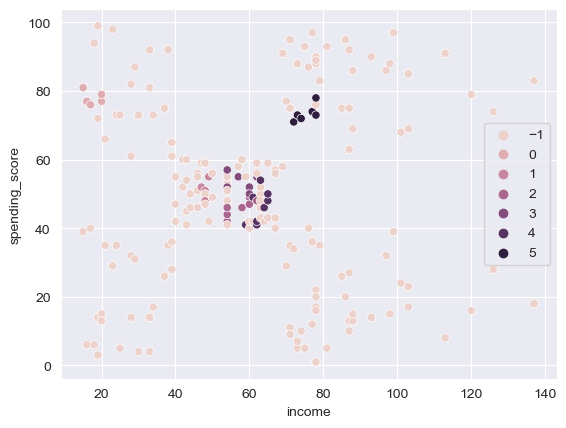

In [55]:
sns.set_style('darkgrid')
sns.set_palette('husl')
sns.scatterplot(data=data, y ='spending_score', x = 'income', hue = preds)

In [59]:
px.scatter(data_frame= data, x = 'income', y = 'spending_score', color= 'clusters')

In [57]:
data['clusters'] = ['cat_a' if x == -1 else 'cat_b' if x == 1 else 'cat_c' if x == 2
                    else 'cat_d' if x == 3 else 'cat_e' if x == 0
                    else 'cat_f' if x == 4 else 'cat_g' for x in preds]

In [58]:
data['clusters'].value_counts()

cat_a    164
cat_f      8
cat_c      7
cat_d      6
cat_g      6
cat_e      5
cat_b      4
Name: clusters, dtype: int64